# Image Processing Notebook
This notebook will contain image processing techniques documented in the book **Image Processing and Aquisition using Python** by **Ravishankar Chityala**

### Imports

In [90]:
import numpy as np
import scipy.ndimage
import scipy.misc
from scipy.misc.pilutil import Image

## Mean Filter
An example of a linear filter is the mean filter. A funciton is linear if it obeys the property, where $f$ is some function
$$
f(x+y) = f(x) + f(y)
$$

### Uses of Mean Filter:
 * Removes noise
 * Enhances quality of image by brightening it
 
### Disadvantages
 * Edges get blurred

In [91]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [92]:
# Initialize the filter as a n x n array; normalize array by number of elements
n = 3
k = np.ones((n, n))/(n*n)

In [93]:
# Perform convolution
meanfiltered = scipy.ndimage.filters.convolve(image, k)

In [94]:
# Convert b from an array to an image
meanfiltered = Image.fromarray(meanfiltered)

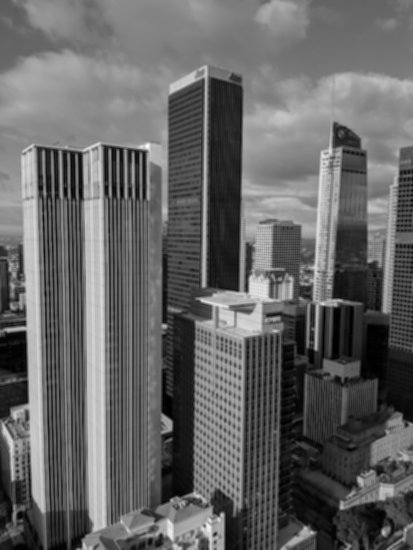

In [95]:
# Save the image
meanfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MeanFilter.png")
meanfiltered

## Median Filter
Functions that do not obey
$$
f(x+y) = f(x) + f(y)
$$
are non-linear. A sliding window is chosen and places on top of the image at position $(i, j)$. All the values under this sliding window are collected and their median is calculated and placed at position $(i, j)$.

### Uses of Median Filter
   * Used to remove salt and pepper noise
   * Removes impulse noise

In [96]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [97]:
# Perform median filter
medianfiltered = scipy.ndimage.filters.median_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

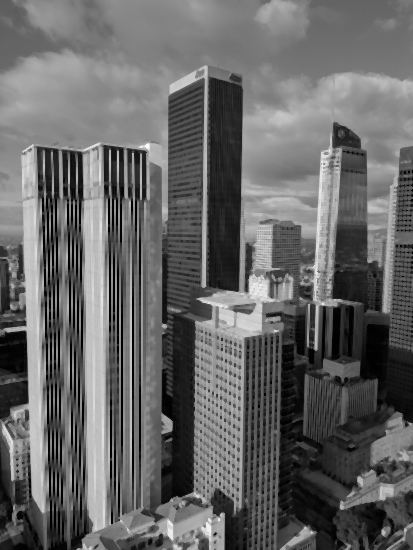

In [98]:
# Convert from array to image
medianfiltered= Image.fromarray(medianfiltered)
# Save the image
medianfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MedianFilter.png")
medianfiltered

## Max Filter
The max filter enhances birhgt points in an image. The maximum values in a sub-image at $(i, j)$

It can be seen in the output image that the buildings have been brightened.

In [99]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [100]:
# Perform the max filter
maxfiltered = scipy.ndimage.filters.maximum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

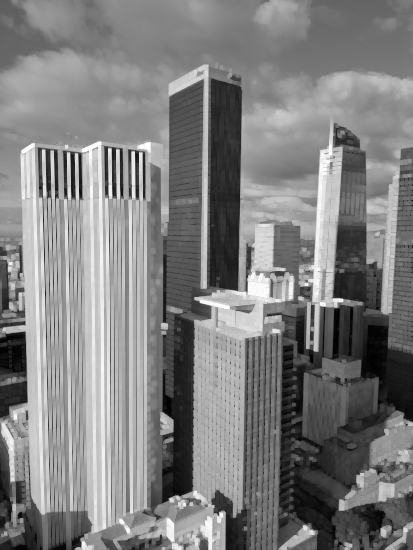

In [101]:
# Convert from array to image
maxfiltered= Image.fromarray(maxfiltered)
# Save the image
maxfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MaxFilter.png")
maxfiltered